In [158]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [159]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [160]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [161]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [162]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [122]:
import random

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Dataset: Solar Power by Country

### 1. Description of the data.

The dataset shows the total power capacity (MW) and new installation, in each cpuntry from 2016-2020.

### My variables of interest

* Country or territory: The name of the country.

* 2016-2020: Electricity produced by Solar Power in MW (MegaWatts).

In [124]:
%ls Solarpower/

solar_power_by_country.csv


In [179]:
datafile = "Solarpower/solar_power_by_country.csv"

#Read the .csv file and store it as pandas Data Frame
df = pd.read_csv(datafile)
df

,Country or territory,2016_New,2016_Total,2017_New,2017_Total,2018_New,2018_Total,2019_New,2019_Total,2020_New,2020_Total,W per capita 2019,Share of total consumption %
0,China,34540.0,78070.0,53000.0,131000.0,45000.0,175018,30100.0,204700,49655.0,254355,147.0,6.2
1,European Union,NaN,101433.0,NaN,107150.0,8300.0,115234,16000.0,134129,18788.0,152917,295.0,6.0
2,United States,14730.0,40300.0,10600.0,51000.0,10600.0,53184,13300.0,60682,14890.0,75572,231.0,3.4
3,Japan,8600.0,42750.0,7000.0,49000.0,6500.0,55500,7000.0,63000,4000.0,67000,498.0,8.3
4,Germany,1520.0,41220.0,1800.0,42000.0,3000.0,45930,3900.0,49200,4583.0,53783,593.0,9.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Oman,NaN,2.0,NaN,8.0,NaN,8,NaN,9,NaN,109,NaN,NaN
76,Colombia,NaN,2.0,NaN,11.0,NaN,86,NaN,90,NaN,107,NaN,NaN
77,Kenya,NaN,32.0,NaN,39.0,NaN,105,NaN,106,NaN,106,NaN,NaN
78,Guatemala,NaN,93.0,NaN,99.0,NaN,101,NaN,101,NaN,101,NaN,NaN


### Cleaning the data...

In [165]:
df.drop(['2016_New','2017_New','2018_New','2019_New','2020_New','W per capita 2019','Share of total consumption %'],axis = 1, inplace = True)
df.head(2)

,Country or territory,2016_Total,2017_Total,2018_Total,2019_Total,2020_Total
0,China,78070.0,131000.0,175018,204700,254355
1,European Union,101433.0,107150.0,115234,134129,152917


In [166]:
df.rename(columns = {"Country or territory":"Country",
                     "2016_Total":"2016",
                     "2017_Total":"2017",
                     "2018_Total":"2018",
                     "2019_Total":"2019",
                     "2020_Total":"2020"},
          inplace=True)
df.head(2)

,Country,2016,2017,2018,2019,2020
0,China,78070.0,131000.0,175018,204700,254355
1,European Union,101433.0,107150.0,115234,134129,152917


### 2. Interesting observations you discovered. This should intrigue the reader and make them want to know more.

* Suprisingly, China, being one of the most contaminant countries in the world, is the one that most Solar Power energy produces.

* Poor countries usually don't have solar power generation, even though they would be the most beneficiated by it.

### 4. Create 2/3 possible questions based on your dataset and try to answer with the tools you learned in class.

Questions:

1. Which country produced the most solar power electricity (MW) in 2020?

In [167]:
maxi = df["2020"].max()
maxid = df['2020'].idxmax()
maxc = df.iloc[1,maxid]

print("The country that produced the most solar power electricity in 2020 was", maxc, "with", maxi, "MW")

The country that produced the most solar power electricity in 2020 was European Union with 254355 MW


2. What is the total solar power electricity produced by Mexico in 2020?

In [168]:
print("The total solar power electricity produced by Mexico in 2020 is:", df.iloc[19,5], "MW")

The total solar power electricity produced by Mexico in 2020 is: 5644 MW


### 3. Two/Three graphical visualisations illustrating the information you've discovered. At least one of your two graphs must support what is explained in (2).

In [169]:
df.set_index('Country', inplace=True)
df.head(2)

,2016,2017,2018,2019,2020
Country,,,,,
China,78070.0,131000.0,175018,204700,254355
European Union,101433.0,107150.0,115234,134129,152917


In [170]:
df_mexico = df.iloc[[19],0:6]
mx_line = df_mexico.transpose()
mx_line

Country,Mexico
2016,320.0
2017,539.0
2018,3200.0
2019,4426.0
2020,5644.0


#### Solar energy production in Mexico through the years.

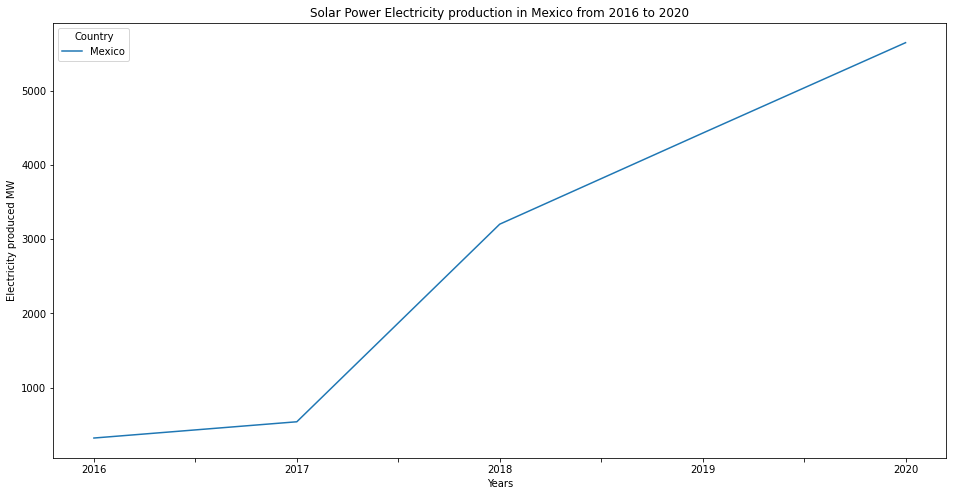

In [172]:
mx_line.plot(kind='line',figsize=(16,8))

plt.title('Solar Power Electricity production in Mexico from 2016 to 2020')
plt.ylabel('Electricity produced MW')
plt.xlabel('Years')

plt.show()

#### Top 5: Solar energy generating countries

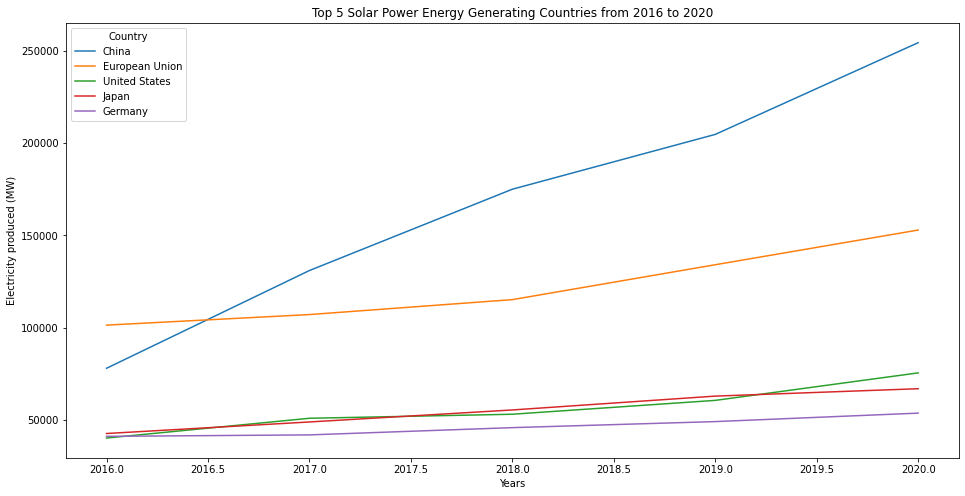

In [177]:
df_top = df.sort_values(by='2020',
                        ascending = False,
                        axis=0,
                        inplace = False)
df_top.head()
df_top5 = df_top.head(5)
df_top5

df_top5 = df_top5.transpose()
df_top5

df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line',
             figsize=(16,8))

plt.title('Top 5 Solar Power Energy Generating Countries from 2016 to 2020')
plt.ylabel('Electricity produced (MW)')
plt.xlabel('Years')

plt.show()

### 5. Problems you have faced (limitations).

* I had a million syntxis errors.
* I couldn't import the file correctly because I was trying to use excel instead of csv.
* I started by using iloc and looking for the data that way, but later I changed the confuration and had problems.

### 6. Next steps to take.